In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('drug200.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

# Alluvial Diagram

In [5]:
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame and it has columns 'Sex' and 'Cholesterol'

# Create a grouped DataFrame that counts each unique combination of 'Sex' and 'Cholesterol'
grouped_df = df.groupby(['Sex', 'Cholesterol']).size().reset_index(name='counts')

# Create a mapping of categories to indices
mapping = {category: i for i, category in enumerate(df['Sex'].unique().tolist() + df['Cholesterol'].unique().tolist())}

# Create lists for source, target, and value
source = grouped_df['Sex'].map(mapping).tolist()
target = grouped_df['Cholesterol'].map(mapping).tolist()
value = grouped_df['counts'].tolist()

# Create the Sankey diagram
fig = go.Figure(data=go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(mapping.keys()),
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
    )))

fig.update_layout(title_text="Alluvial Diagram", font_size=10)
fig.show()

# Violin Plot

In [6]:
df2 = pd.read_csv('Cleaned_ships_data.csv')
df2.head()

,Company_Name,ship_name,built_year,gt,dwt,length,width
0,PRELUDE,Offshore Support Vessel,2017,499167,394330,489,74
1,MSC LORETO,Container Ship,2023,236184,240000,399,60
2,MSC FEBE,Container Ship,2019,232618,228149,400,62
3,MSC ARINA,Container Ship,2019,228741,228111,400,61
4,EVER GOVERN,Container Ship,2019,219688,198937,400,59


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

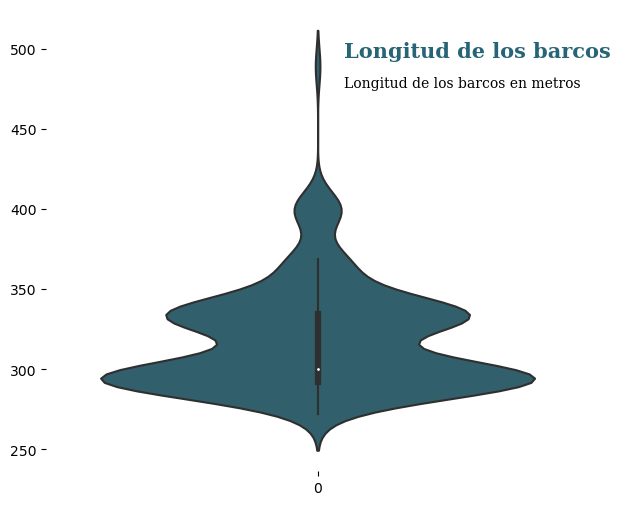

In [8]:
fig, ax = plt.subplots(1,1, figsize = (7,6))
sns.violinplot(data = df2['length'], color = '#276475')

fig.text(0.55, 0.8, 'Longitud de los barcos', fontweight = 'bold', fontsize = 15, fontfamily ='serif', color = '#276475')
fig.text(0.55, 0.75, 'Longitud de los barcos en metros', fontweight = 'light', fontsize = 10, fontfamily ='serif', color = 'black')

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

    
plt.savefig('violin_plot.png')
plt.show()

# Fuentes

Datos Alluvial Diagram. https://www.kaggle.com/datasets/prathamtripathi/drug-classification?rvi=1

Datos Violin Plot. https://www.kaggle.com/datasets/ibrahimonmars/global-cargo-ships-dataset